3. Identify if any columns in `lemonade.csv` are normally distributed. For normally distributed columns: 
    - Use a 2 sigma decision rule to isolate the outliers. 
        - Do these make sense? 
        - Should certain outliers be kept or removed?
        

4. Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from `lemonade.csv`

Let's make our basic imports.
Numpy for vectorized operations on arrays, pandas for tabular data, matplotlib.pyplot for visualizations, as well as seaborn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Let's load up our data.  We will grab the csv file from the codeup curriculum.

In [2]:
# grab the csv linked inside the curriculum
df = pd.read_csv('https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv')

In [3]:
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         365 non-null    object 
 1   Day          365 non-null    object 
 2   Temperature  365 non-null    float64
 3   Rainfall     365 non-null    float64
 4   Flyers       365 non-null    int64  
 5   Price        365 non-null    float64
 6   Sales        365 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 20.1+ KB


In [5]:
df['Date'] = pd.to_datetime(df.Date)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         365 non-null    datetime64[ns]
 1   Day          365 non-null    object        
 2   Temperature  365 non-null    float64       
 3   Rainfall     365 non-null    float64       
 4   Flyers       365 non-null    int64         
 5   Price        365 non-null    float64       
 6   Sales        365 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 20.1+ KB


In [7]:
# reset the datetime version of Date as our index:
df = df.set_index('Date')

In [8]:
df['month'] = df.index.month_name()

In [9]:
df.head(2)

,Day,Temperature,Rainfall,Flyers,Price,Sales,month
Date,,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10,January
2017-01-02,Monday,28.9,1.33,15,0.5,13,January


In [10]:
df.month.value_counts()

January      31
March        31
May          31
July         31
August       31
October      31
December     31
April        30
June         30
September    30
November     30
February     28
Name: month, dtype: int64

In [11]:
# Start with visualizations and basic descriptive stats:

In [12]:
df.describe()

,Temperature,Rainfall,Flyers,Price,Sales
count,365.000000,365.000000,365.000000,365.0,365.000000
mean,61.224658,0.825973,40.104110,0.5,27.865753
std,18.085892,0.273890,13.786445,0.0,30.948132
min,15.100000,0.400000,-38.000000,0.5,7.000000
25%,49.700000,0.650000,31.000000,0.5,20.000000
50%,61.100000,0.740000,39.000000,0.5,25.000000
75%,71.700000,0.910000,49.000000,0.5,30.000000
max,212.000000,2.500000,80.000000,0.5,534.000000


In [13]:
# immediate notes based on describe:
# negative flier value? looks like it may be a clerical error
# extremely high temperature value?

For Day:


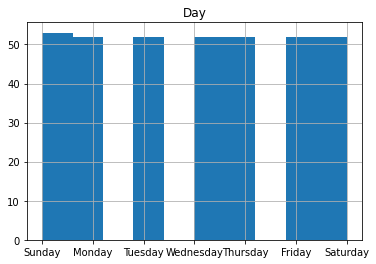

---------
For Temperature:


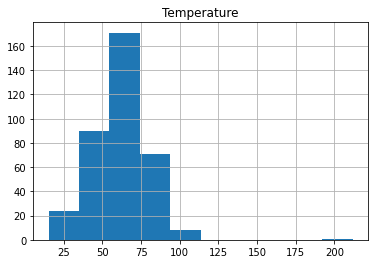

---------
For Rainfall:


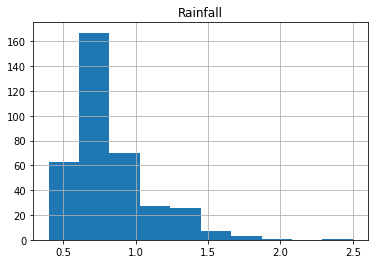

---------
For Flyers:


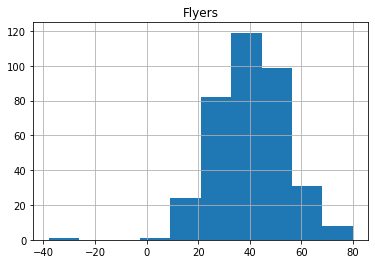

---------
For Price:


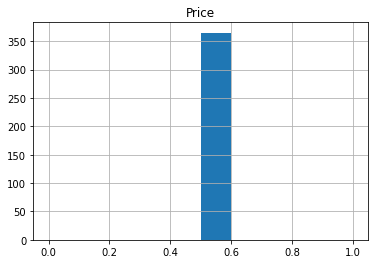

---------
For Sales:


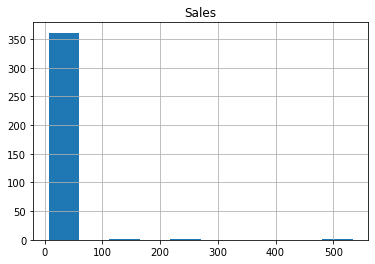

---------
For month:


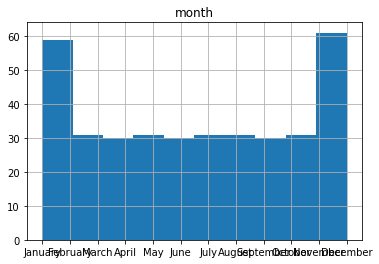

---------


In [14]:
for col in df.columns:
    print(f'For {col}:')
    df[col].hist()
    plt.title(col)
    plt.show()
    print('---------')

 - Takeaways based on histogram assessment:
     - We have some high outliers on sales? Are those legitimate?
     - We have at least one exceptionally high rainfall event.
     - Is that rainfall event real? Does it coincide with anyhting else weird in the data set? (i.e. the High temp or negative flier day)

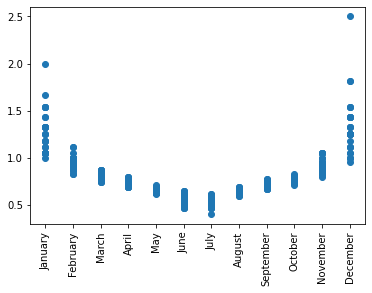

In [15]:
plt.scatter(df.month, df.Rainfall)
plt.xticks(rotation=90)
plt.show()

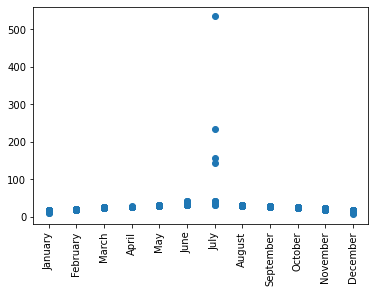

In [16]:
plt.scatter(df.month, df.Sales)
plt.xticks(rotation=90)
plt.show()

#### It looks like based on our visualizations we see clear trends but there are a couple points that look odd. An exceptionally high temperature and an exceptionally high rainfall value.  Additionaly, there appears to be a negative flyer value.

Let's use what we were discussing regarding IQR and Tukey methodology in the scope of a function.

## 1. Define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.

In [17]:
def get_lower_and_upper_bounds(col, mult=1.5):
    '''
    positional arguments:
    col: a pandas Series
    keyword arguments:
    mult: default 1.5, the magnutude specified for the IQR rule
    
    returns:
    lower_bound, upper_bound: two float values representing the fence values requested
    '''
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - mult * iqr
    upper_bound = q3 + mult * iqr
    return lower_bound,upper_bound

## 2. Using [lemonade.csv](https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv) dataset and focusing on continuous variables:
    - Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of `lemonade.csv`, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?

In [18]:
# at a multiplier of 1.5:
# initialize outliers as a dictionary
outliers = {}
# for every column in df.columns
for col in df.columns:
    #if the datatype of that column is of the numpy number family:
    if np.issubdtype(df[col].dtype, np.number):
        #use our function to get the lower and upper bounds
        lower_bound, upper_bound = get_lower_and_upper_bounds(
            df[col])
        print(f'''Lower bound for {col}: {lower_bound}
        Upper bound for {col}: {upper_bound}.''')
        # establish outliers[colname] as a new dictionary
        outliers[col] = {}
        #establish key-value pairs for bound values
        # and do the same as a subset of the dataframe that represents
        #where our outliers sit
        outliers[col]['bounds'] = {'upper': upper_bound, 'lower': lower_bound}
        outliers[col]['df'] = df[(df[col] > upper_bound) | (
            df[col] < lower_bound)]
        

Lower bound for Temperature: 16.700000000000003
        Upper bound for Temperature: 104.7.
Lower bound for Rainfall: 0.26
        Upper bound for Rainfall: 1.3.
Lower bound for Flyers: 4.0
        Upper bound for Flyers: 76.0.
Lower bound for Price: 0.5
        Upper bound for Price: 0.5.
Lower bound for Sales: 5.0
        Upper bound for Sales: 45.0.


In [19]:
# check out the values inside outliers
outliers.keys()

dict_keys(['Temperature', 'Rainfall', 'Flyers', 'Price', 'Sales'])

In [20]:
outliers['Temperature'].keys()

dict_keys(['bounds', 'df'])

In [21]:
outliers['Temperature']['bounds'].keys()

dict_keys(['upper', 'lower'])

In [22]:
# structurally: 
# our dictionary outliers has a key Temperature,
# which is a dictionary,
# which has a key bounds, which is a dictionary,
# which has a key upper, which is a float
outliers['Temperature']['bounds']['upper']

104.7

In [23]:
outliers['Temperature']['df']

,Day,Temperature,Rainfall,Flyers,Price,Sales,month
Date,,,,,,,
2017-02-11,Saturday,212.0,0.91,35,0.5,21,February
2017-12-31,Sunday,15.1,2.50,9,0.5,7,December


In [24]:
[key for key in outliers.keys()]

['Temperature', 'Rainfall', 'Flyers', 'Price', 'Sales']

In [25]:
[print('\n----------------\n', key, '\n', outliers[key]['df'].to_markdown()) for key in outliers.keys()]


----------------
 Temperature 
 | Date                | Day      |   Temperature |   Rainfall |   Flyers |   Price |   Sales | month    |
|:--------------------|:---------|--------------:|-----------:|---------:|--------:|--------:|:---------|
| 2017-02-11 00:00:00 | Saturday |         212   |       0.91 |       35 |     0.5 |      21 | February |
| 2017-12-31 00:00:00 | Sunday   |          15.1 |       2.5  |        9 |     0.5 |       7 | December |

----------------
 Rainfall 
 | Date                | Day       |   Temperature |   Rainfall |   Flyers |   Price |   Sales | month    |
|:--------------------|:----------|--------------:|-----------:|---------:|--------:|--------:|:---------|
| 2017-01-01 00:00:00 | Sunday    |          27   |       2    |       15 |     0.5 |      10 | January  |
| 2017-01-02 00:00:00 | Monday    |          28.9 |       1.33 |       15 |     0.5 |      13 | January  |
| 2017-01-03 00:00:00 | Tuesday   |          34.5 |       1.33 |       27 |     0.5 |

[None, None, None, None, None]

In [26]:
# at a multiplier of 3:
# initialize outliers as a dictionary
outliers = {}
# for every column in df.columns
for col in df.columns:
    #if the datatype of that column is of the numpy number family:
    if np.issubdtype(df[col].dtype, np.number):
        #use our function to get the lower and upper bounds
        lower_bound, upper_bound = get_lower_and_upper_bounds(
            df[col], mult=3)
        print(f'''Lower bound for {col}: {lower_bound}
        Upper bound for {col}: {upper_bound}.''')
        # establish outliers[colname] as a new dictionary
        outliers[col] = {}
        #establish key-value pairs for bound values
        # and do the same as a subset of the dataframe that represents
        #where our outliers sit
        outliers[col]['bounds'] = {'upper': upper_bound, 'lower': lower_bound}
        outliers[col]['df'] = df[(df[col] > upper_bound) | (
            df[col] < lower_bound)]
[print('\n----------------\n', key, '\n', outliers[key]['df'].to_markdown()) for key in outliers.keys()]

Lower bound for Temperature: -16.299999999999997
        Upper bound for Temperature: 137.7.
Lower bound for Rainfall: -0.13
        Upper bound for Rainfall: 1.69.
Lower bound for Flyers: -23.0
        Upper bound for Flyers: 103.0.
Lower bound for Price: 0.5
        Upper bound for Price: 0.5.
Lower bound for Sales: -10.0
        Upper bound for Sales: 60.0.

----------------
 Temperature 
 | Date                | Day      |   Temperature |   Rainfall |   Flyers |   Price |   Sales | month    |
|:--------------------|:---------|--------------:|-----------:|---------:|--------:|--------:|:---------|
| 2017-02-11 00:00:00 | Saturday |           212 |       0.91 |       35 |     0.5 |      21 | February |

----------------
 Rainfall 
 | Date                | Day     |   Temperature |   Rainfall |   Flyers |   Price |   Sales | month    |
|:--------------------|:--------|--------------:|-----------:|---------:|--------:|--------:|:---------|
| 2017-01-01 00:00:00 | Sunday  |          27 

[None, None, None, None, None]

In [27]:
df['rainfall_zscores'] = (df.Rainfall - df.Rainfall.mean()) / df.Rainfall.std()

## - Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers below the lower bound in each colum of `lemonade.csv`. Do these lower outliers make sense?Which outliers should be kept?

## - Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds,  identify the outliers above the upper_bound in each colum of `lemonade.csv`. Do these upper outliers make sense? Which outliers should be kept?

In [28]:
df[df.rainfall_zscores.abs() > 3]

,Day,Temperature,Rainfall,Flyers,Price,Sales,month,rainfall_zscores
Date,,,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10,January,4.286488
2017-01-16,Monday,30.6,1.67,24,0.5,12,January,3.081626
2017-12-05,Tuesday,22.0,1.82,11,0.5,10,December,3.629291
2017-12-10,Sunday,31.3,1.82,15,0.5,11,December,3.629291
2017-12-31,Sunday,15.1,2.50,9,0.5,7,December,6.112037


 - It looks like these rainfall numbers make sense.  They are exceptional, but they sit around the same dates and look like a couple of atypically heavy storms rolled through.  They do not appear to be clerical errors and roll around the same values over these small time windows.

## Let's look at that weird negative flyer value now:

In [29]:
df[df.Flyers < 0]

,Day,Temperature,Rainfall,Flyers,Price,Sales,month,rainfall_zscores
Date,,,,,,,,
2017-11-21,Tuesday,47.0,0.95,-38,0.5,20,November,0.452836


#### Let's check around the dates of 11/21 to see what the regular values around it look like.

In [30]:
df.loc['2017-11-18':'2017-11-23']

,Day,Temperature,Rainfall,Flyers,Price,Sales,month,rainfall_zscores
Date,,,,,,,,
2017-11-18,Saturday,48.7,1.05,37,0.5,19,November,0.817946
2017-11-19,Sunday,55.9,0.87,34,0.5,23,November,0.160748
2017-11-20,Monday,55.6,0.87,41,0.5,22,November,0.160748
2017-11-21,Tuesday,47.0,0.95,-38,0.5,20,November,0.452836
2017-11-22,Wednesday,48.7,1.00,40,0.5,19,November,0.635391
2017-11-23,Thursday,51.9,0.87,47,0.5,23,November,0.160748


 - It appears that the surrounding dates have 41 and 40 flyers handed out respectively.  It would appear that 38 would be a perfectly reasonable number of flyers, and I presume that no one was going around taking flyers out of potential customers hands, as this would likely constitute assault I think.  I'm going to presume that the negative value was a clerical error, and fix it by flipping it positive:

In [31]:
# reassign flyers to the absolute value of flyers
df['Flyers'] = df['Flyers'].abs()

In [32]:
df[df['Flyers'] < 0]

,Day,Temperature,Rainfall,Flyers,Price,Sales,month,rainfall_zscores
Date,,,,,,,,


In [33]:
# looks good now! 

## Next up: exceptionally high temperature:

In [34]:
# based on what we saw in our outlier dataframes, let's pull that one high one.
df.loc['2017-02-11']

Day                 Saturday
Temperature            212.0
Rainfall                0.91
Flyers                    35
Price                    0.5
Sales                     21
month               February
rainfall_zscores    0.306792
Name: 2017-02-11 00:00:00, dtype: object

 - In this instance, its not as simple as flipping the sign, but certainly the temperature was not actually 200 degrees that day, unless we had an apocalypse earlier that I didn't know about.

In [35]:
# similarly to the way before: let's examine the surrounding dates to see what regular looks like.
df.loc['2017-02-08': '2017-02-14']

,Day,Temperature,Rainfall,Flyers,Price,Sales,month,rainfall_zscores
Date,,,,,,,,
2017-02-08,Wednesday,52.6,0.87,31,0.5,22,February,0.160748
2017-02-09,Thursday,42.7,1.00,39,0.5,19,February,0.635391
2017-02-10,Friday,50.0,0.91,40,0.5,20,February,0.306792
2017-02-11,Saturday,212.0,0.91,35,0.5,21,February,0.306792
2017-02-12,Sunday,55.6,0.83,41,0.5,22,February,0.014704
2017-02-13,Monday,46.4,1.11,34,0.5,18,February,1.037012
2017-02-14,Tuesday,47.7,0.95,35,0.5,19,February,0.452836


In [36]:
# I'm going to impute 2/10's temperature onto 2/11
df.loc['2017-02-11', 'Temperature'] = df.loc['2017-02-10', 'Temperature']

In [37]:
# sanity check: did that reassign?
df.loc['2017-02-11', 'Temperature']

50.0